In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("dataset_task2.csv")

In [ ]:
df.head() #viewing dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape #Dataset has 200 rows and 5 columns

(200, 5)

In [ ]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.isnull().sum() #No imputers required

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df = df.drop("CustomerID", axis=1) #dropping useless columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
#This has changed the object column Gender into a numeric column(with values 0 and 1)

In [ ]:
df["Gender"].value_counts()

,count
Gender,
0,112
1,88


In [ ]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 dimensions
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

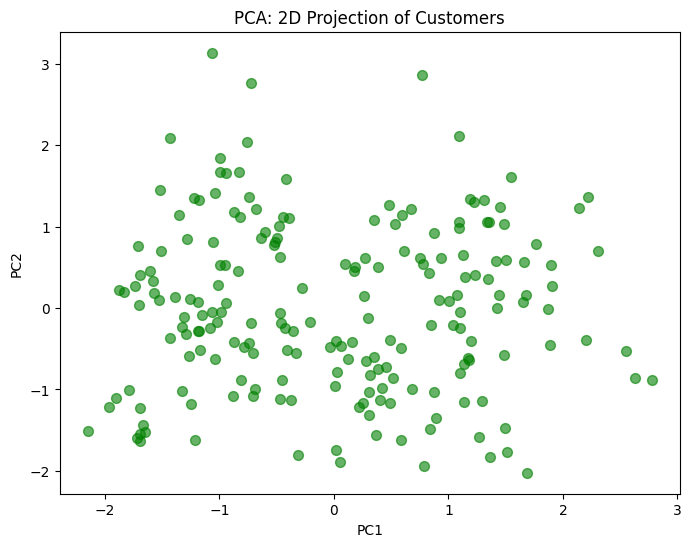

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c='green', s=50, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: 2D Projection of Customers')
plt.show()

In [ ]:
pca_3d = PCA(n_components=3)
X = pca_3d.fit_transform(X)

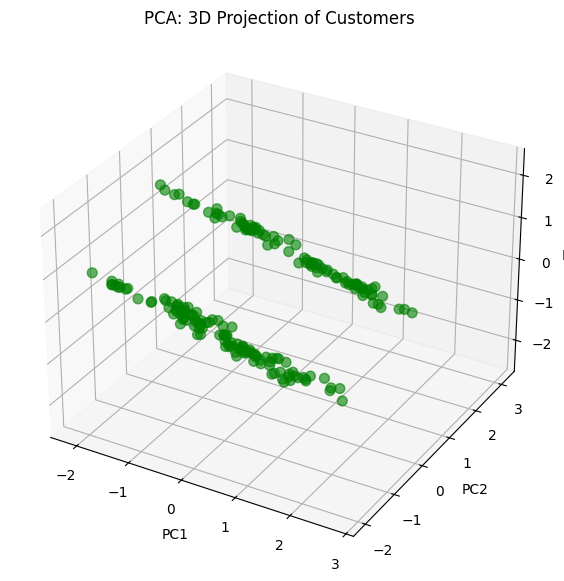

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c='green', s=50, alpha=0.6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA: 3D Projection of Customers')
plt.show()

In [ ]:
#K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#elbow method:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

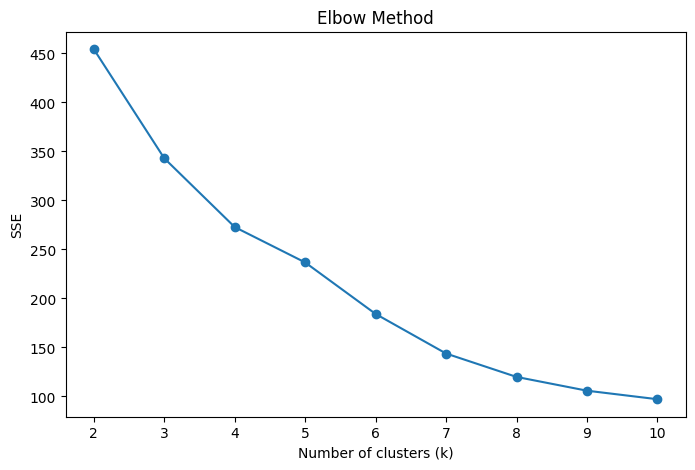

In [ ]:
#plotting elbow method:
plt.figure(figsize=(8,5))
plt.plot(range(2,11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()
# k=4 seems to be optimal because of the slope which largely becomes gentle after 4

In [ ]:

best_k = 0
best_score = -1
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)
    if score > best_score:
        best_score = score
        best_k = k
        print(f"Best k so far: {best_k} with silhouette score {best_score}")



Best k so far: 2 with silhouette score 0.30148570457572627
Best k so far: 3 with silhouette score 0.32736233519916635
Best k so far: 4 with silhouette score 0.39453092943543
Best k so far: 6 with silhouette score 0.4170577730796686
Best k so far: 7 with silhouette score 0.4269404180955695


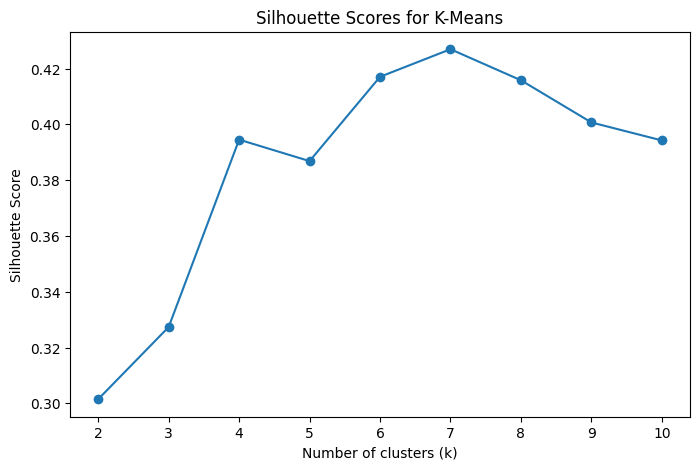

Optimal K (max silhouette score): 7


In [ ]:
#plotting silhouette scores
plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means')
plt.show()

print(f"Optimal K (max silhouette score): {best_k}")

#k=7 is chosen.

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

k_best = 7
kmeans = KMeans(n_clusters=k_best, random_state=42)
k_labels = kmeans.fit_predict(X)

print("Silhouette Score:", silhouette_score(X, k_labels)) #range from -1 to 1, clusters are well seperated
print("Davies-Bouldin Index:", davies_bouldin_score(X, k_labels)) #range from 0 to infinity,clusters are compact and separated
print("Calinski-Harabasz Score:", calinski_harabasz_score(X, k_labels)) #range from 0 to infinty, clusters are fairly compact and separated

Silhouette Score: 0.4182251586705845
Davies-Bouldin Index: 0.7844367412854847
Calinski-Harabasz Score: 116.75395313971823


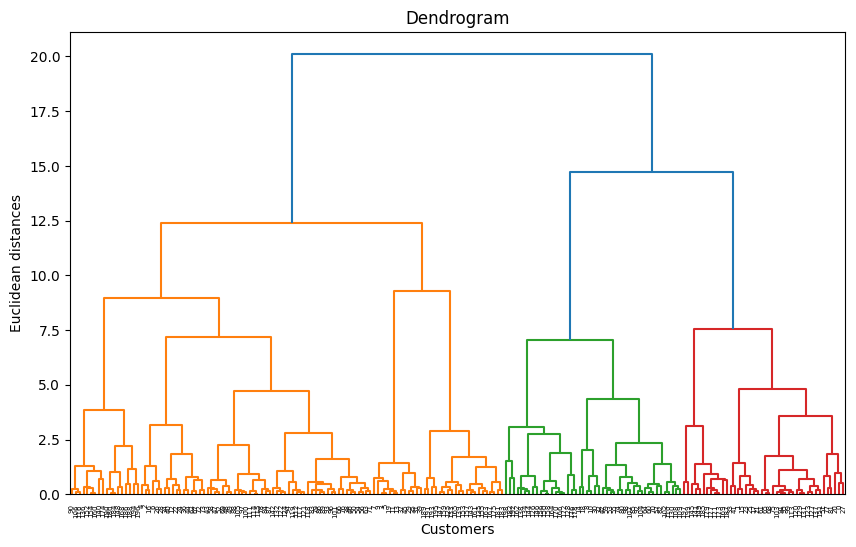

In [ ]:
#HIERARCHICAL CLUSTERING:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
#trying to determine no of clusters
#k=7/8

In [ ]:
hc = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X)

# Metrics
print("Silhouette Score:", silhouette_score(X, hc_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X,hc_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X, hc_labels))
#K-Means Better

Silhouette Score: 0.3703835283917885
Davies-Bouldin Index: 0.805660030162255
Calinski-Harabasz Score: 102.4665215400669


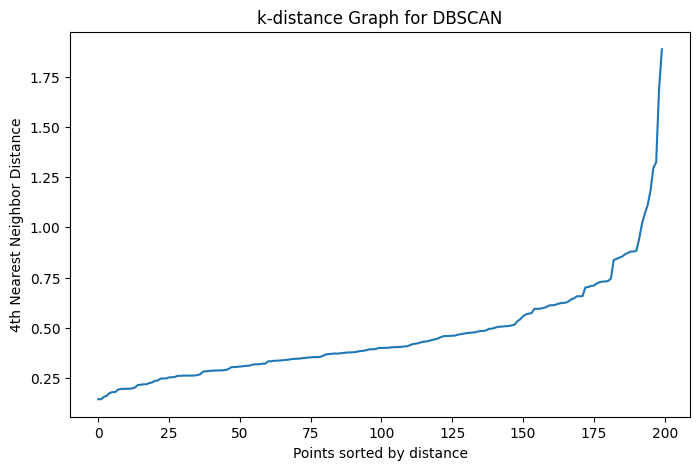

In [ ]:
#DBSCAN:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:,4])
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('k-distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.875, min_samples=5)
db_labels = dbscan.fit_predict(X)

print("Silhouette Score:", silhouette_score(X, db_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X, db_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X, db_labels))
#K-Means still better

Silhouette Score: 0.3170731973557496
Davies-Bouldin Index: 1.209674711249882
Calinski-Harabasz Score: 51.740887653240925


In [ ]:
#HDBSCAN:
!pip install hdbscan

In [ ]:
import hdbscan
from hdbscan import validity

best_score = -1
best_size = None

for size in [5, 10, 15, 20, 25]:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=size)
    labels = clusterer.fit_predict(X)

    # Compute DBCV (ignores noise points automatically)
    dbcv_score = validity.validity_index(X, labels)

    print(f"min_cluster_size={size} -> DBCV: {dbcv_score:.3f}")

    if dbcv_score > best_score:
        best_score = dbcv_score
        best_size = size

print(f"Best min_cluster_size = {best_size} with DBCV = {best_score:.3f}")


/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_

min_cluster_size=5 -> DBCV: 0.410
min_cluster_size=10 -> DBCV: 0.409
min_cluster_size=15 -> DBCV: 0.422
min_cluster_size=20 -> DBCV: 0.418
min_cluster_size=25 -> DBCV: 0.412
Best min_cluster_size = 15 with DBCV = 0.422


In [ ]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import hdbscan

# Use the optimal parameter found through tuning
optimal_min_cluster_size = 15

# Initialize HDBSCAN with the optimal parameter
clusterer = hdbscan.HDBSCAN(min_cluster_size=optimal_min_cluster_size, min_samples=5)
hdb_labels = clusterer.fit_predict(X)

# Evaluate the final model
mask = hdb_labels != -1
print("Silhouette Score:", silhouette_score(X[mask], hdb_labels[mask]))
print("Davies-Bouldin Index:", davies_bouldin_score(X[mask], hdb_labels[mask]))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X[mask], hdb_labels[mask]))

Silhouette Score: 0.3391431494206333
Davies-Bouldin Index: 1.3723042751787191
Calinski-Harabasz Score: 86.3297446300719


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


K-Means is the best algorithm

In [ ]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [ ]:
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features = ['Gender']

In [ ]:
cluster_summary_numeric = df.groupby('Cluster')[numeric_features].mean().round(2)

In [ ]:
cluster_summary_categorical = df.groupby('Cluster')[categorical_features].agg(lambda x: x.mode()[0])

In [ ]:
cluster_summary = pd.concat([cluster_summary_numeric, cluster_summary_categorical], axis=1)
print(cluster_summary)

           Age  Annual Income (k$)  Spending Score (1-100)  Gender
Cluster                                                           
0        51.55               60.91                   30.32       1
1        29.62               77.82                   68.18       0
2        49.42               46.25                   39.72       0
3        44.60               92.33                   21.60       0
4        24.62               31.81                   66.25       1
5        26.70               32.83                   66.96       0
6        30.04               81.68                   66.96       1


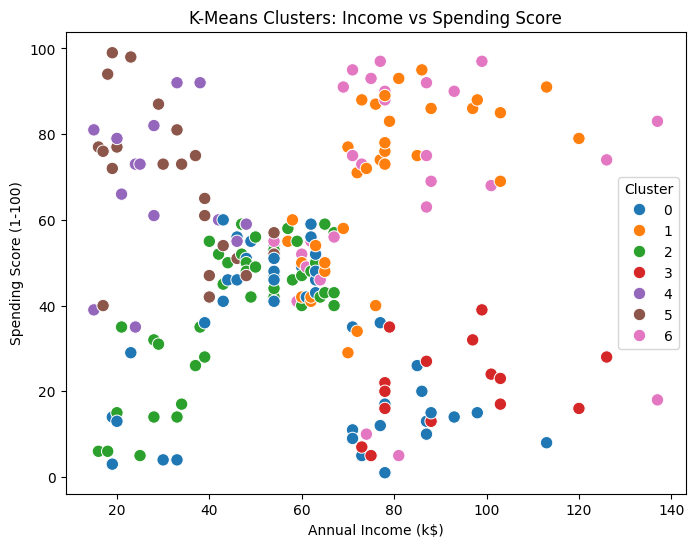

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=80)
plt.title('K-Means Clusters: Income vs Spending Score')
plt.show()

/tmp/ipython-input-2539370173.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='Age', data=df, ci=None, palette='tab10')
/tmp/ipython-input-2539370173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Age', data=df, ci=None, palette='tab10')


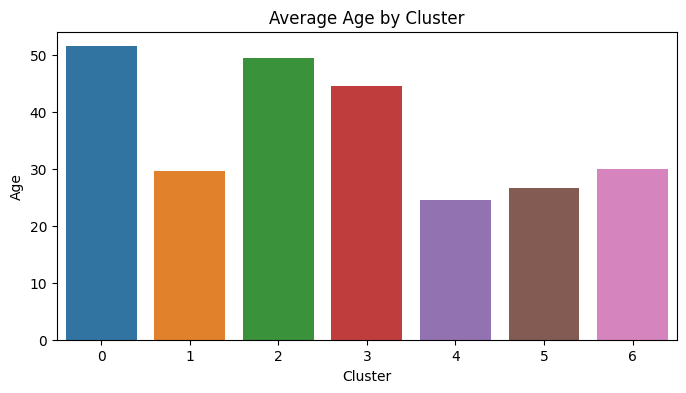

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Cluster', y='Age', data=df, ci=None, palette='tab10')
plt.title('Average Age by Cluster')
plt.show()

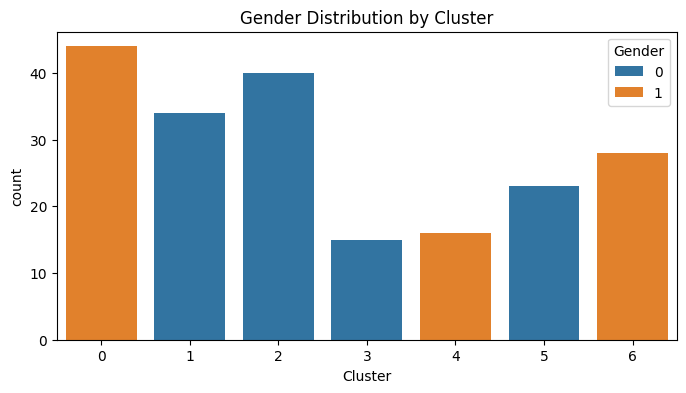

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Cluster', hue='Gender', data=df, palette='tab10')
plt.title('Gender Distribution by Cluster')
plt.show()

In [ ]:
personas = []
for idx, row in cluster_summary.iterrows():
    persona = f"Cluster {idx}: "

    # Age description
    if row['Age'] < 25:
        persona += "Young, "
    elif row['Age'] < 40:
        persona += "Middle-Age, "
    else:
        persona += "Older, "

    # Income description
    if row['Annual Income (k$)'] >= df['Annual Income (k$)'].quantile(0.75):
        persona += "High-Income, "
    elif row['Annual Income (k$)'] <= df['Annual Income (k$)'].quantile(0.25):
        persona += "Low-Income, "
    else:
        persona += "Medium-Income, "

    # Spending description
    if row['Spending Score (1-100)'] >= df['Spending Score (1-100)'].quantile(0.75):
        persona += "High-Spending"
    elif row['Spending Score (1-100)'] <= df['Spending Score (1-100)'].quantile(0.25):
        persona += "Low-Spending"
    else:
        persona += "Moderate-Spending"

    personas.append(persona)

print("\n Cluster Personas:")
for p in personas:
    print(p)













 Cluster Personas:
Cluster 0: Older, Medium-Income, Low-Spending
Cluster 1: Middle-Age, Medium-Income, Moderate-Spending
Cluster 2: Older, Medium-Income, Moderate-Spending
Cluster 3: Older, High-Income, Low-Spending
Cluster 4: Young, Low-Income, Moderate-Spending
Cluster 5: Middle-Age, Low-Income, Moderate-Spending
Cluster 6: Middle-Age, High-Income, Moderate-Spending
